## KNeighbors Classification Approach ##

In [9]:
# Import Dependencies
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

### Load/Preprocess Customer Churn Dataset ###

In [10]:
# Load 'customer_churn_complete' Into Pandas DataFrame
conn=sqlite3.connect('../Resources/customer_churn_data.db')
query = "SELECT * FROM customer_churn_complete"
customer_churn_complete = pd.read_sql(query, conn)
conn.close()

# Check That 'customer_churn_complete' Loaded Succesfully
customer_churn_complete.head()

,age,female,male,tenure,basic_subscription,standard_subscription,premium_subscription,monthly_contract,quarterly_contract,annual_contract,total_spend,payment_delay,usage_frequency,last_interaction,support_calls,churn
0,30.0,1.0,0.0,39.0,0.0,1.0,0.0,0.0,0.0,1.0,932.0,18.0,14.0,17.0,5.0,1.0
1,65.0,1.0,0.0,49.0,1.0,0.0,0.0,1.0,0.0,0.0,557.0,8.0,1.0,6.0,10.0,1.0
2,55.0,1.0,0.0,14.0,1.0,0.0,0.0,0.0,1.0,0.0,185.0,18.0,4.0,3.0,6.0,1.0
3,58.0,0.0,1.0,38.0,0.0,1.0,0.0,1.0,0.0,0.0,396.0,7.0,21.0,29.0,7.0,1.0
4,23.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,0.0,0.0,617.0,8.0,20.0,20.0,5.0,1.0


In [11]:
# Define Features Set
X = customer_churn_complete.drop(columns=['churn'])

# Define Target
y = customer_churn_complete['churn']

# Split Into Train And Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, stratify=y)

In [12]:
# Create StandardScaler Instance
scaler = StandardScaler()

# Fit Standard Scaler
X_scaler = scaler.fit(X_train)

# Scale Training And Testing Data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Visualize Scaling
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.607952,-0.896126,0.896126,0.908809,-0.694102,-0.714471,1.402905,-0.523961,1.247086,-0.805053,-0.772289,1.716921,-0.198578,-1.581141,-0.266377
1,-0.292183,-0.896126,0.896126,0.734694,-0.694102,-0.714471,1.402905,-0.523961,-0.801869,1.242154,-0.150637,-1.597547,-1.590224,-1.348811,-0.266377
2,-0.213241,1.115914,-1.115914,-0.019803,1.440710,-0.714471,-0.712807,-0.523961,1.247086,-0.805053,1.259654,0.178061,0.497245,-0.419491,-0.585500
3,-1.713142,1.115914,-1.115914,0.270388,-0.694102,1.399638,-0.712807,-0.523961,-0.801869,1.242154,1.144754,-1.597547,-0.430519,-1.116481,1.648362
4,1.286660,1.115914,-1.115914,1.082924,-0.694102,1.399638,-0.712807,-0.523961,-0.801869,1.242154,-1.216880,1.598547,-0.662460,1.787644,1.010116


In [13]:
# Define Range Of k Values To Try
k_range = range(1, 15)

# List To Store Cross-Validation Scores For Each k
cv_scores = []

### Perform Cross-Validation For Each k ###

In [14]:
# Cross-validation For Each k
for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k, weights='distance')
    cross_validation_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=10, scoring='accuracy')
    cv_scores.append(cross_validation_scores.mean())

In [15]:
# Find The k With The Highest Mean Cross-Validation Score
optimal_k = k_range[np.argmax(cv_scores)]
optimal_score = max(cv_scores)
print("Optimal number of neighbors:", optimal_k)
print("Optimal cross-validation score:", optimal_score)

Optimal number of neighbors: 10
Optimal cross-validation score: 0.901117439078892


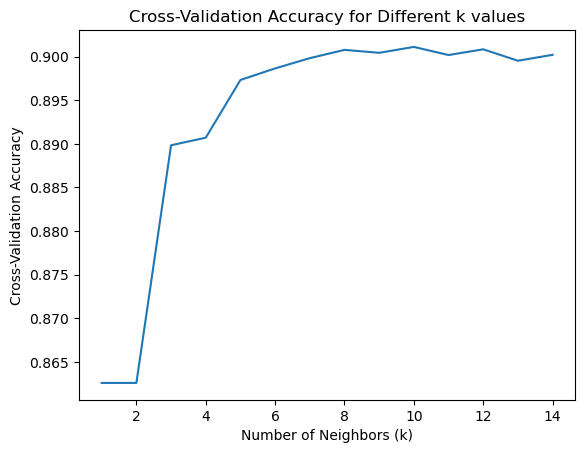

In [16]:
# Plot Cross-Validation Scores For Each k
plt.plot(k_range, cv_scores)
plt.xlabel('\nNumber of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy\n')
plt.title('Cross-Validation Accuracy for Different k Values\n')
plt.show()

### Perform KNeighbors Classification for Best k ###

In [17]:
# Instantiate The Model With k = 10 Neighbors
knn_best_k_model = KNeighborsClassifier(n_neighbors=10, weights='distance')

# Train The Model
knn_best_k_model.fit(X_train_scaled, y_train)

# Create Predictions
predictions = knn_best_k_model.predict(X_test_scaled)

### Model Evaluation: Confusion Matrix and Classification Report ###

In [18]:
# Calculate The Confusion Matrix
confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix_df = pd.DataFrame(confusion_matrix,
                                   index=['Actual 0', 'Actual 1'],
                                   columns=['Predicted 0', 'Predicted 1'])

# Display Results
print('Confusion Matrix')
display(confusion_matrix_df)
print('\nClassification Report')
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,49011,7168
Actual 1,5153,64970



Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89     56179
         1.0       0.90      0.93      0.91     70123

    accuracy                           0.90    126302
   macro avg       0.90      0.90      0.90    126302
weighted avg       0.90      0.90      0.90    126302

